# Adam Thomson - Week 6 Quiz - Qiskit

## Use Qiskit to investigate the effect of the operation of XZX and ZXZ on (1,0), (0,1) and (1,1).

In [16]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

sampler = SamplerV2()

def run_qc_and_return_counts(qc):
    result = sampler.run([qc], shots=1000).result()
    return result[0].data.meas.get_counts()

### Setup our quantum circuits

In [30]:
qc_xzx0 = QuantumCircuit(1)
qc_xzx1 = QuantumCircuit(1)
qc_xzxh = QuantumCircuit(1)
qc_zxz0 = QuantumCircuit(1)
qc_zxz1 = QuantumCircuit(1)
qc_zxzh = QuantumCircuit(1)

### Apply operators and inspect results

#### XZX((1,0))

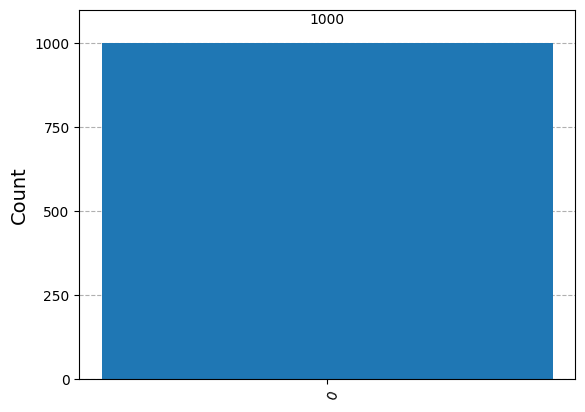

In [27]:
# Run XZX
qc_xzx0.x(0)
qc_xzx0.z(0)
qc_xzx0.x(0)
qc_xzx0.measure_all()
plot_histogram(run_qc_and_return_counts(qc_xzx0))

XZX((1,0)) = (1,0) = 0

#### XZX((0,1))

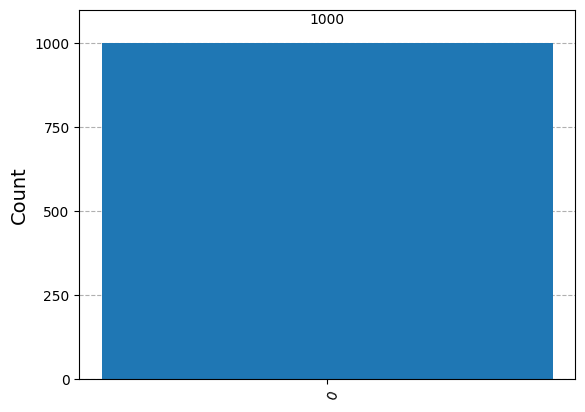

In [19]:
# Set qubit to (0,1)
qc_xzx1.x(0)
# Run XZX
qc_xzx1.x(0)
qc_xzx1.z(0)
qc_xzx1.x(0)
qc_xzx1.measure_all()
plot_histogram(run_qc_and_return_counts(qc_xzx1))

XZX((0,1)) = (1,0) = 0

#### XZX((1,1))

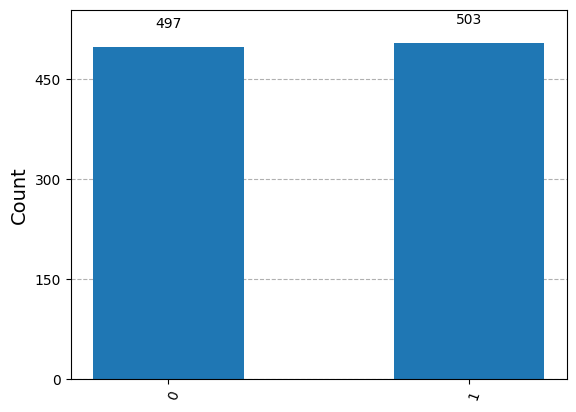

In [25]:
# Set qubit to (1,1)
qc_xzxh.h(0)
# Run XZX
qc_xzxh.x(0)
qc_xzxh.z(0)
qc_xzxh.x(0)
qc_xzxh.measure_all()
plot_histogram(run_qc_and_return_counts(qc_xzxh))

XZX((1,1)) = (1,1) = {0,1}

#### ZXZ((1,0))

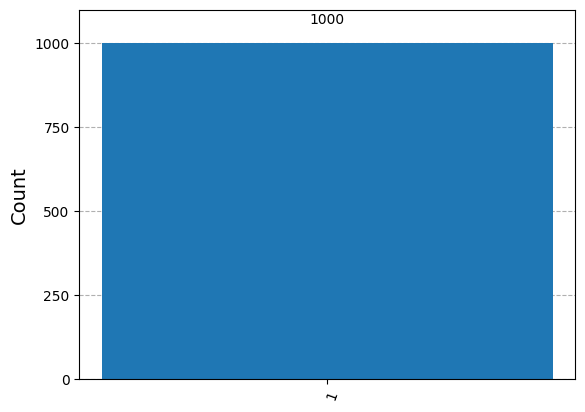

In [31]:
# Run ZXZ
qc_zxz0.z(0)
qc_zxz0.x(0)
qc_zxz0.z(0)
qc_zxz0.measure_all()
plot_histogram(run_qc_and_return_counts(qc_zxz0))

ZXZ((1,0)) = (0,1) = 1

#### ZXZ((0,1))

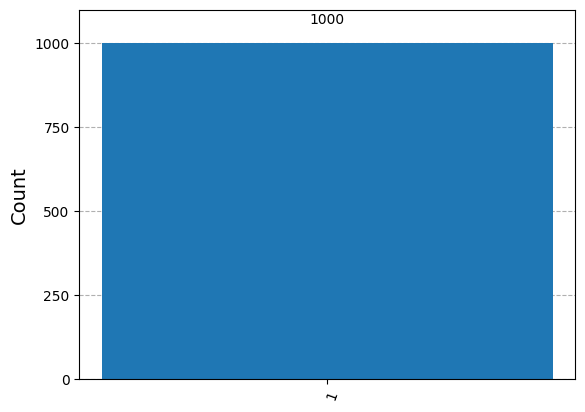

In [29]:
# Set qubit to (0,1)
qc_zxz1.x(0)
# Run ZXZ
qc_zxz1.z(0)
qc_zxz1.x(0)
qc_zxz1.z(0)
qc_zxz1.measure_all()
plot_histogram(run_qc_and_return_counts(qc_zxz1))

ZXZ((0,1)) = (0,1) = 1

#### ZXZ((1,1))

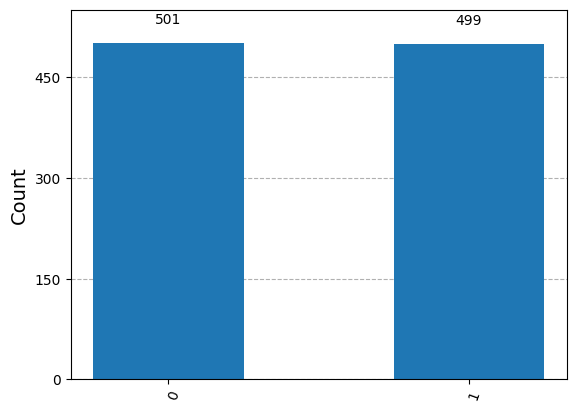

In [33]:
# Set qubit to (1,1)
qc_zxzh.h(0)
# Run ZXZ
qc_zxzh.z(0)
qc_zxzh.x(0)
qc_zxzh.z(0)
qc_zxzh.measure_all()
plot_histogram(run_qc_and_return_counts(qc_zxzh))

ZXZ((1,1)) = (1,1) = {0,1}

## Compare with a Python calculation using NumPy

### Import and variable declarations

In [2]:
import numpy as np

vec0 = [1,0]
vec1 = [0,1]
vech = [1,1]

pauli_x = np.array([[0, 1], [1, 0]], dtype=complex)
pauli_z = np.array([[1, 0], [0, -1]], dtype=complex)

In [12]:
# Simplify XZX for reuse
xzx = np.linalg.multi_dot([pauli_x, pauli_z, pauli_x])
xzx0 = np.dot(xzx, vec0)
print(f'XZX((1,0)) = {xzx0}')
xzx1 = np.dot(xzx, vec1)
print(f'XZX((0,1)) = {xzx1}')
xzxh = np.dot(xzx, vech)
print(f'XZX((1,1)) = {xzxh}')

# Simplify ZXZ for reuse
zxz = np.linalg.multi_dot([pauli_z, pauli_x, pauli_z])
zxz0 = np.dot(zxz, vec0)
print(f'ZXZ((1,0)) = {zxz0}')
zxz1 = np.dot(zxz, vec1)
print(f'ZXZ((0,1)) = {zxz1}')
zxzh = np.dot(zxz, vech)
print(f'ZXZ((1,1)) = {zxzh}')

XZX((1,0)) = [-1.+0.j  0.+0.j]
XZX((0,1)) = [0.+0.j 1.+0.j]
XZX((1,1)) = [-1.+0.j  1.+0.j]
ZXZ((1,0)) = [ 0.+0.j -1.+0.j]
ZXZ((0,1)) = [-1.+0.j  0.+0.j]
ZXZ((1,1)) = [-1.+0.j -1.+0.j]


These match the results found from quantum circuits when you consider measurements use absolute values!